In [2]:
#Importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
#Haberman Cancer Survival data set
#Link do dataset   https://www.kaggle.com/krpiku/haberman.csv
#Description: The data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#Carregando o dataset a partir de um csv
#git_testes
data = pd.read_csv("https://raw.githubusercontent.com/lopeslopesedu/padroes/main/haberman.csv",sep =",")
#local_testes
#data = pd.read_csv("C:/ifes/recpad/testes/data_sets/haberman cancer/haberman.csv",sep =",")
#Quantidade de linhas e colunas do dataset
data.shape
data

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1


In [4]:
#correlação dos dados
data.corr().round(3)

,age,year,nodes,status
age,1.000,0.105,-0.061,0.053
year,0.105,1.000,-0.005,0.003
nodes,-0.061,-0.005,1.000,0.290
status,0.053,0.003,0.290,1.000


In [5]:
#Caracteristica escolhida
X, y = data.drop('status', axis=1), data['status']
X.shape, y.shape, set(y)

((305, 3), (305,), {1, 2})

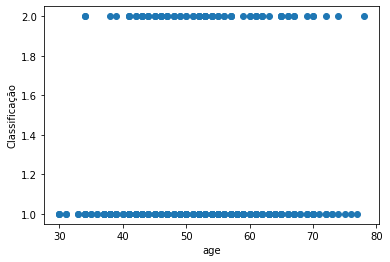

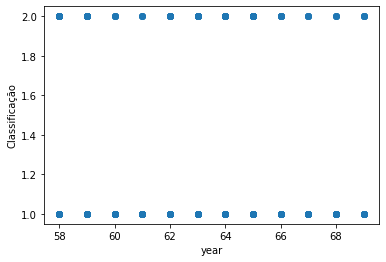

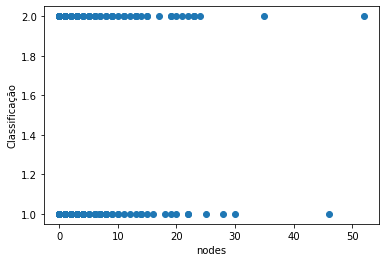

In [6]:
for i in range(X.shape[1]):
    plt.xlabel(X.columns[i])
    plt.ylabel("Classificação")
    plt.scatter(X[X.columns[i]], y)
    plt.show()

    # 1 - survived - 2 -   dead

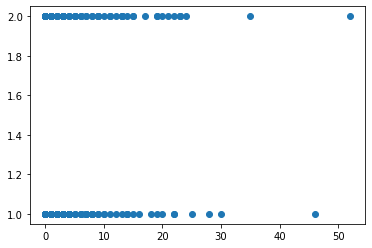

In [7]:
X2 = data['nodes']
plt.xlabel = ("Nodes")
plt.ylabel = ("Status")
plt.scatter(X2, y)
plt.show()

In [8]:
#importando as bibliotecas para os proximos passos
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


MSE:  0.2525


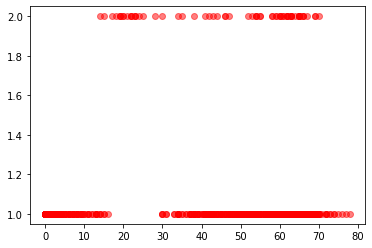

In [9]:
#treina
#deve ser utilizado o Logistic Regression
model = LogisticRegression()
model.fit(X, y)
#predict
ypred = model.predict(X)
#error
erro = mean_squared_error(y, ypred).round(4)
print("\nMSE: ", erro)
#plota
plt.plot(X,ypred,'ro',label=f"erro: {erro}",alpha=0.5)
plt.show()


Intercept - -2.116130980827411
Inicio - -0.6161309808274109
Fim - -3.616130980827411


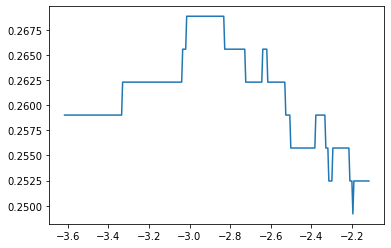


Intercept - -3.616130980827411
Inicio - -4.6161309808274105
Fim - -2.616130980827411


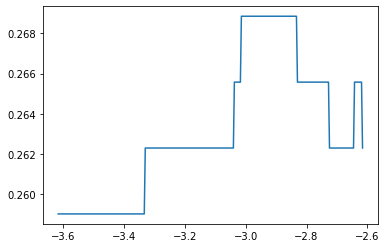


Intercept - -2.616130980827411
Inicio - -4.6161309808274105
Fim - -0.6161309808274109


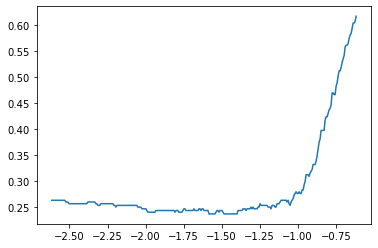

In [13]:
#deltas
dt = [-1.5,1,2]
#numero de amostras utilizadas
amostras = 305

for i in range(len(model.intercept_)):    
    for j in range(len(dt)):
        intercept = model.intercept_[i]  
        ptsX = np.linspace(intercept , intercept + dt[j], amostras).reshape(-1,1)
        ptsY = np.empty(ptsX.shape[0])

        for k in range(ptsY.shape[0]):
            model.intercept_[i] = ptsX[k]
            yp = model.predict(X)
            ptsY[k] = mean_squared_error(y, yp)
        #Imprime os dados
        print("\nIntercept - " + str(intercept))
        print("Inicio - "+str(intercept - dt[j]))
        print("Fim - "+str(intercept + dt[j]))

                      
        #Plota o grafico gerado
        plt.plot(ptsX, ptsY)
        plt.show()   
        